**1. Installing and Importing Dependencies**

In [7]:
import cv2
import mediapipe as mp
import numpy as np
import os
from matplotlib import pyplot as plt
import time

**2. Key Points using Holistic**

In [8]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [9]:
def mediapipe_detection(image, model):

    # Convert the BGR image to RGB before processing
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Image is no longer writeable
    image.flags.writeable= False 

    # Make prediction
    results = model.process(image) 

    # Image is now writeable
    image.flags.writeable = True 

    # Convert back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [10]:
def draw_landmarks (image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [11]:
def draw_styled_landmarks (image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
    mp_drawing. DrawingSpec (color=(80,110,10), thickness=1, circle_radius=1),
    mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic. POSE_CONNECTIONS,
    mp_drawing. DrawingSpec (color=(80,22,10), thickness=2, circle_radius=4),
    mp_drawing. DrawingSpec (color=(80,44,121), thickness=2, circle_radius=2)
    )

    # Draw Left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic. HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec (color= (121,44,250), thickness=2, circle_radius=2)
    )

    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
    mp_drawing. DrawingSpec (color=(245,66,230), thickness=2, circle_radius=2)
    )

In [12]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic:
    while cap.isOpened():
    # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed - Sign Lang', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.face_landmarks.landmark)

468

In [14]:
frame

array([[[222, 229, 237],
        [226, 232, 240],
        [225, 231, 239],
        ...,
        [170, 176, 179],
        [168, 174, 178],
        [165, 171, 174]],

       [[226, 232, 240],
        [222, 229, 237],
        [223, 230, 238],
        ...,
        [171, 177, 180],
        [167, 173, 176],
        [167, 173, 176]],

       [[223, 230, 238],
        [225, 231, 239],
        [225, 231, 239],
        ...,
        [166, 172, 175],
        [166, 172, 175],
        [168, 174, 178]],

       ...,

       [[ 70,  85,  94],
        [ 77,  92, 101],
        [ 80,  96, 104],
        ...,
        [173, 191, 194],
        [175, 192, 196],
        [176, 193, 197]],

       [[ 81,  97, 106],
        [ 81,  97, 106],
        [ 84,  99, 108],
        ...,
        [175, 192, 196],
        [177, 194, 198],
        [176, 193, 197]],

       [[ 84,  99, 108],
        [ 86, 102, 110],
        [ 86, 102, 110],
        ...,
        [177, 194, 198],
        [175, 192, 196],
        [172, 189, 193]]

In [15]:
draw_styled_landmarks(frame, results)

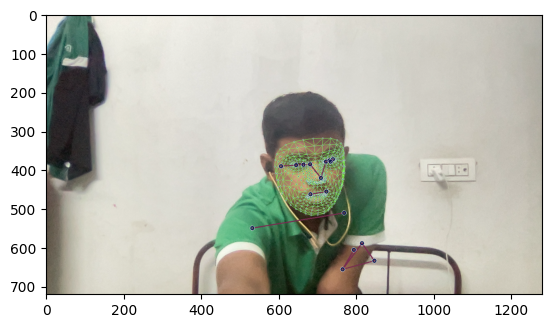

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

**3. Extract Keypoint Values**

In [17]:
len(results.face_landmarks.landmark)

468

In [18]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

: 

In [ ]:
len(results.right_hand_landmarks.landmark)

21

In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
results.right_hand_landmarks.landmark

[x: 0.23295316
y: 0.68464726
z: 2.6843298e-07
, x: 0.29055518
y: 0.6796077
z: -0.022235436
, x: 0.34479874
y: 0.6255004
z: -0.027779713
, x: 0.38566694
y: 0.565827
z: -0.032073
, x: 0.42415002
y: 0.5457987
z: -0.036015067
, x: 0.33812422
y: 0.48737603
z: -0.00544982
, x: 0.36631355
y: 0.41010687
z: -0.014258559
, x: 0.37896532
y: 0.3577578
z: -0.024561536
, x: 0.38840795
y: 0.30911782
z: -0.03358622
, x: 0.31207165
y: 0.45995277
z: -0.0043808003
, x: 0.33819792
y: 0.37364697
z: -0.011784841
, x: 0.3504085
y: 0.31416273
z: -0.022366455
, x: 0.35843018
y: 0.2609813
z: -0.031128958
, x: 0.28237045
y: 0.45157805
z: -0.006999538
, x: 0.301814
y: 0.36416054
z: -0.017611507
, x: 0.31214097
y: 0.30931008
z: -0.028182702
, x: 0.32051873
y: 0.26086628
z: -0.035939932
, x: 0.24699667
y: 0.4568901
z: -0.012064703
, x: 0.24737339
y: 0.3846975
z: -0.02456141
, x: 0.24906495
y: 0.3375228
z: -0.032017104
, x: 0.25236365
y: 0.29267865
z: -0.03687118
]

In [ ]:
results.face_landmarks.landmark

[x: 0.5399178
y: 0.6137726
z: -0.025555601
, x: 0.5386939
y: 0.56362975
z: -0.04157071
, x: 0.53953564
y: 0.58154726
z: -0.023230653
, x: 0.5319031
y: 0.5214689
z: -0.028696157
, x: 0.5383629
y: 0.54903
z: -0.04354246
, x: 0.5382264
y: 0.53170097
z: -0.03964135
, x: 0.5381077
y: 0.49243236
z: -0.016533079
, x: 0.4852015
y: 0.5050775
z: 0.016490525
, x: 0.5376248
y: 0.46358025
z: -0.010044188
, x: 0.5371755
y: 0.44504502
z: -0.01066516
, x: 0.53568757
y: 0.37783173
z: 0.0020065587
, x: 0.5400886
y: 0.6208292
z: -0.024870899
, x: 0.5403388
y: 0.6264665
z: -0.022422798
, x: 0.5406459
y: 0.62894344
z: -0.019093977
, x: 0.54093933
y: 0.63297266
z: -0.018549811
, x: 0.54104036
y: 0.6380909
z: -0.020051274
, x: 0.5411782
y: 0.64502466
z: -0.022003075
, x: 0.54146063
y: 0.6531577
z: -0.021233741
, x: 0.5421618
y: 0.66870344
z: -0.014313505
, x: 0.5390104
y: 0.57183343
z: -0.037991364
, x: 0.53281873
y: 0.57302827
z: -0.027466895
, x: 0.4581349
y: 0.46242273
z: 0.057944577
, x: 0.5064121
y: 0.5

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

**4. Setup Folders for Collection**

In [ ]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30